In [1]:
import sys, getopt, os
import bonesis
import pandas as pd
from colomoto_jupyter import tabulate
import mpbn
import itertools
import math
import numpy
import networkx as nx
import pickle
#import ginsim
import re
import subprocess
import numpy as np
from matplotlib import pyplot as plt
from math import isnan

In [2]:
from copy import deepcopy 

In [3]:
sys.path.append('../../../py_src/')
import funForBonesis

In [4]:
def add_obs_mutant_nonReach(mutation, phenotypes,data):
    for p in phenotypes:
        pMut = p+"_"+[*mutation][0]+"_"+str([*mutation.values()][0])
        data[pMut] = data[p].copy()
        data[pMut][[*mutation][0]] = [*mutation.values()][0]

In [5]:
geneOrder = ["Egr1","Junb","Bclaf1","Myc","Fli1","Gata2","Spi1","Cebpa","Gata1","Klf1","Tal1","Ikzf1","Zfpm1","CDK46CycD","CIPKIP"]


dataTable = pd.read_csv("../obsDataDis.csv",index_col = 0)




data = dataTable.to_dict("index")


clean_data = dict() #Bug of mpbn if nan in dict
for o in data.keys():
    clean_data[o] = {k: data[o][k] for k in data[o] if not isnan(data[o][k])}

data= clean_data
## add mutant obs

    

obsData = pd.DataFrame.from_dict(data, orient="index").fillna('')[geneOrder]

#Add some mutant obs

obsData = obsData[geneOrder].reindex(["iHSC", "srHSC", "qHSC","diff","pLymph","pNeuMast","pMk","pEr","zero"])


obsData = obsData.transpose()

obsDataView = obsData.style.apply(lambda x: ["background: ligthgrey" if v == "" else  "background: darkred" if v == 1.0 else "background: darkblue" for v in x], axis = 1).apply(lambda x: ["color: lightgrey" if v == "" else  "color: darkred" if v == 1.0 else "color: darkblue" for v in x], axis = 1)

#obsDataView = obsDataView.style.
obsDataView.set_precision(0)





,iHSC,srHSC,qHSC,diff,pLymph,pNeuMast,pMk,pEr,zero
Egr1,0,0,1,nan,0,0,0,0,nan
Junb,0,0,1,nan,0,0,0,0,nan
Bclaf1,1,1,0,nan,1,0,0,0,nan
Myc,0,0,1,nan,0,1,1,1,nan
Fli1,1,1,1,nan,0,0,1,0,nan
Gata2,1,0,1,nan,1,1,0,0,nan
Spi1,0,0,0,nan,1,1,0,0,nan
Cebpa,0,0,0,nan,0,1,0,0,nan
Gata1,0,0,0,nan,0,0,1,1,nan
Klf1,0,0,0,nan,0,0,0,1,nan


In [6]:
## Adjustement
dataTable["Myc"].loc["pNeuMast"] =  float('NaN')
dataTable["Myc"].loc["pEr"] =  float('NaN')
dataTable["Myc"].loc["pMk"] =  float('NaN')
dataTable["CDK46CycD"].loc["pMk"] =  float('NaN')
dataTable["Bclaf1"].loc["pLymph"] =  float('NaN')
dataTable["CIPKIP"].loc["pLymph"] =  float('NaN')

dataTable["Egr1"].loc["srHSC"] =  float('NaN')
dataTable["Gata2"].loc["pNeuMast"] =  float('NaN')


data = dataTable.to_dict("index")


clean_data = dict() #Bug of mpbn if nan in dict
for o in data.keys():
    clean_data[o] = {k: data[o][k] for k in data[o] if not isnan(data[o][k])}

data= clean_data

## Add zero obs
data["zero"] ={'Egr1': 0.0,
 'Junb': 0,
 'Tal1': 0.0,
 'Bclaf1': 0.0,
 'Myc': 0.0,
 'Fli1': 0.0,
 'Gata2': 0.0,
 'Ikzf1': 0,
 'Spi1': 0,
 'Cebpa': 0,
 'Gata1': 0.0,
 'Klf1': 0,
 'Zfpm1': 0.0,
 'CIPKIP': 0,
 'CDK46CycD': 0.0}

pd.DataFrame(data)
pd.DataFrame(data)

#data["G0MkHSC"] = {"Klf1":0,'Junb': 1,'Tal1':1,'CIPKIP': 1,"Ikzf1":0,"Cebpa":0,"Spi1":0,"CDK46CycD":0}
#data["prolifNeuMast"] = {'Egr1': 0,'Junb': 0,'Tal1': 0,'Fli1': 0,'Spi1': 1,'Cebpa': 1,'Klf1': 0,'Zfpm1': 0.0,'CIPKIP': 0,"CDK46CycD":1}
#add_obs_mutant_nonReach({'Gata1': 0},["pEr","pMk"],data)
#add_obs_mutant_nonReach({'Fli1': 0},["pMk"],data)
dataTable

/Users/leonard/bin/miniconda3/envs/mostPermBn/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
iHSC,0.0,0,1.0,0.0,1,1.0,0,0,0,0,1.0,0.0,NaN,0.0,0.0
srHSC,NaN,0,1.0,0.0,1,0.0,0,0,0,0,NaN,NaN,NaN,1.0,0.0
qHSC,1.0,1,0.0,1.0,1,1.0,0,0,0,0,1.0,NaN,NaN,0.0,1.0
preDiff,0.0,0,1.0,1.0,0,0.0,1,0,0,0,NaN,NaN,NaN,0.0,0.0
pLymph,0.0,0,NaN,0.0,0,1.0,1,0,0,0,0.0,1.0,NaN,0.0,NaN
pNeuMast,0.0,0,0.0,NaN,0,NaN,1,1,0,0,0.0,1.0,0.0,0.0,0.0
pMk,0.0,0,0.0,NaN,1,0.0,0,0,1,0,1.0,0.0,1.0,NaN,0.0
pEr,0.0,0,0.0,NaN,0,0.0,0,0,1,1,NaN,1.0,1.0,0.0,0.0


In [7]:
    

obsData = pd.DataFrame.from_dict(data, orient="index").fillna('')[geneOrder]

#Add some mutant obs

obsData = obsData[geneOrder].reindex(["iHSC", "srHSC", "qHSC","preDiff","pLymph","pNeuMast","pMk","pEr","zero"])


obsData = obsData.transpose()

obsDataView = obsData.style.apply(lambda x: ["background: ligthgrey" if v == "" else  "background: darkred" if v == 1.0 else "background: darkblue" for v in x], axis = 1).apply(lambda x: ["color: lightgrey" if v == "" else  "color: darkred" if v == 1.0 else "color: darkblue" for v in x], axis = 1)

#obsDataView = obsDataView.style.
obsDataView.set_precision(0)

,iHSC,srHSC,qHSC,preDiff,pLymph,pNeuMast,pMk,pEr,zero
Egr1,0,,1,0,0,0,0,0,0
Junb,0,0,1,0,0,0,0,0,0
Bclaf1,1,1,0,1,,0,0,0,0
Myc,0,0,1,1,0,,,,0
Fli1,1,1,1,0,0,0,1,0,0
Gata2,1,0,1,0,1,,0,0,0
Spi1,0,0,0,1,1,1,0,0,0
Cebpa,0,0,0,0,0,1,0,0,0
Gata1,0,0,0,0,0,0,1,1,0
Klf1,0,0,0,0,0,0,0,1,0


# computing graph layout...


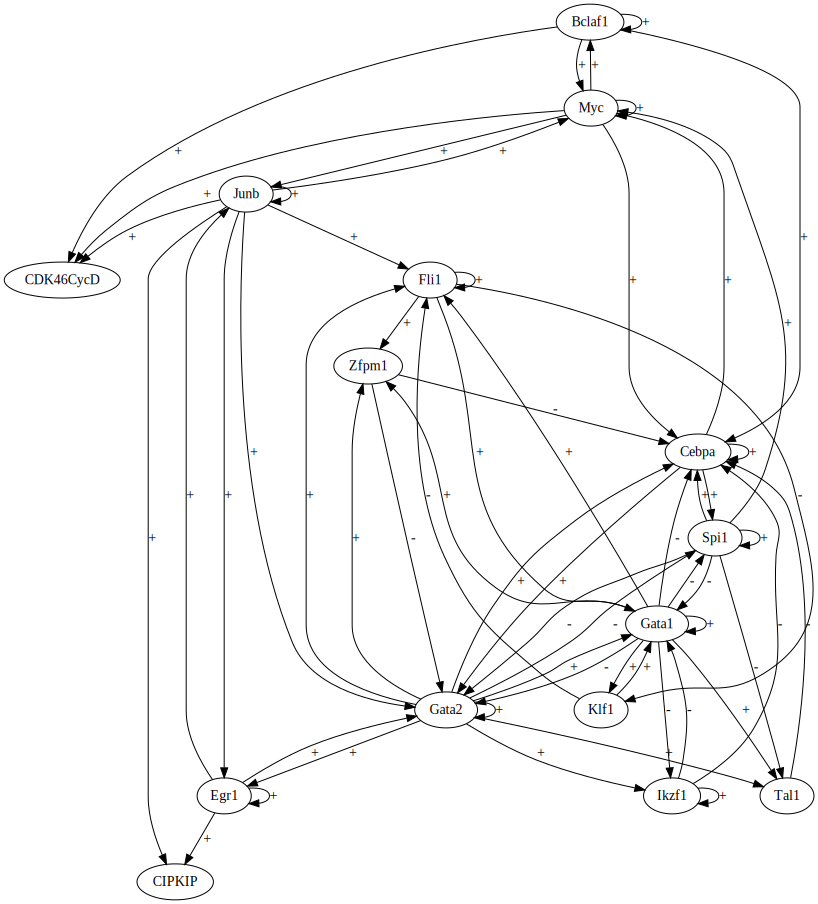

In [8]:
influenceGraphTable = pd.read_table("../influenceGraph/infGraphTable45.tsv")
influenceGraphTable = influenceGraphTable.drop_duplicates(subset=['tf', 'target', 'mor'])
len(influenceGraphTable)
    
# Loading constraints
    
# Creating influence graph
inf = []
for r in influenceGraphTable.index:
    inf.append((influenceGraphTable["tf"][r],influenceGraphTable["target"][r],dict(sign= influenceGraphTable["mor"][r])))


#inf.remove(('Junb', 'Gata2', {'sign': 1})) #  no trust in auto neg from scenic 

dom0 = bonesis.InfluenceGraph(inf, maxclause = 3,exact=False)
allEdges = funForBonesis.multiDiGraphToEdgeList(dom0)
dom0
#inf.append(('Gata1', 'CDK46CycD', {'sign': 1})) # in litt and in Scenic in 42 runs    

dom = bonesis.InfluenceGraph(inf, maxclause = 3,exact=True)


#len(dom.edges())

dom

In [9]:
len(inf)

60

In [10]:
dom = bonesis.InfluenceGraph(inf,exact=False, maxclause = 3)
dom
bo = bonesis.BoNesis(dom, data)
bo.settings["parallel"] = 24

fLymph = bo.fixed(~bo.obs("pLymph"))
fEr = bo.fixed(~bo.obs("pEr"));
fMk = bo.fixed(~bo.obs("pMk"));
fNeuMast = bo.fixed(~bo.obs("pNeuMast"));
start = ~bo.obs("iHSC")

start >= ~bo.obs("srHSC")
start >= ~bo.obs("qHSC")
start >= fLymph
start >= ~bo.obs("preDiff") >= fEr
start >= ~bo.obs("preDiff") >= fMk
start >= ~bo.obs("preDiff") >= fNeuMast

~bo.obs("srHSC") >= start
~bo.obs("qHSC") >= start
~bo.obs("preDiff") / ~bo.obs("qHSC")
~bo.obs("preDiff") / ~bo.obs("srHSC")
~bo.obs("preDiff") / start
~bo.obs('zero') / fNeuMast
~bo.obs('zero') / fMk
~bo.obs('zero') / fEr

~bo.obs('zero') / fLymph
~bo.obs("iHSC") >> "fixpoints" ^ {bo.obs(obs) for obs in ["pLymph", "pNeuMast","pEr","pMk","zero"]};


In [11]:
view = bo.boolean_networks()
view.standalone(output_filename="test.asp")


In [ ]:
solutions = []
for bn in bo.diverse_boolean_networks(): # limit is optional
    if(funForBonesis.has_cyclic(bn)):
        print("HAS CYCLIC ATTRACTORS, IGNORING")
        continue
    if len(solutions) > 1000:
        break
    solutions.append(bn)
    print(len(solutions))
print(len(solutions))

Grounding...done in 0.2s


In [ ]:
len(solutions)

In [ ]:
solutions[2]

In [ ]:
table = pd.DataFrame(solutions)
for n in table.nunique().index:
    if table.nunique()[n] > 1:
        print(n)
        print(pd.DataFrame(table[n].unique())) 

In [ ]:
pd.DataFrame(solutions[2].attractors(reachable_from=data["iHSC"]))

In [ ]:
def testPerturb(model,perturbations,data):
    test_mut = model.copy()
    for perturbation in perturbations:
        del test_mut[[*perturbation.keys()][0]]
        test_mut[[*perturbation.keys()][0]] = [*perturbation.values()][0]
        data_mut = deepcopy(data)
        if ([*perturbation.values()][0] == 1) | ([*perturbation.values()][0] == 0):
            data_mut["iHSC"][[*perturbation.keys()][0]] = [*perturbation.values()][0]
    #print("reachability of quiescence state:")
    #print(test_mut.reachability(data["iHSC"],data_mut["qHSC"]))
    #print("reachability of SR state:")
    #print(test_mut.reachability(data["iHSC"],data_mut["srHSC"]))
    att = pd.DataFrame(test_mut.attractors(reachable_from=data_mut["iHSC"]))[geneOrder]
    return att

In [ ]:
def getMutAttractors(perturbations,sol,data):
    geneMut = list(perturbations[0].keys())[0]
    mut = []
    for s in solutions :
        if list(perturbations[0].values())[0] == 0 :
            koStr = "KO"
        else:
            koStr = "KI"
            

        possiblePhDf = pd.DataFrame(testPerturb(s,perturbations,data))
        possiblePhDf.sort_values(by= geneOrder, inplace=True)
        possiblePhDf.index = [str(i) for i in range(0,len(possiblePhDf))]
        possiblePh = possiblePhDf.to_dict() 
        #print(m)
        if possiblePh not in mut:
            mut.append(possiblePh)
            
    possiblePhAll = pd.DataFrame(mut[0])
    possiblePhAll = possiblePhAll.rename(index=lambda s: geneMut + koStr + "_0" + "_" + s)
    i=1
    for a in mut[1:]:
        df = pd.DataFrame(a)
        df.index = [str(j) for j in range(0,len(df))]
        df = df.rename(index=lambda s: geneMut + koStr +"_"+ str(i) + "_" + s)
        possiblePhAll = possiblePhAll.append(df)

        i += 1

    return possiblePhAll



In [ ]:
getMutAttractors(perturbations=[{"Spi1":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Cebpa":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Junb":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Junb":1}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Egr1":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Egr1":1}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Gata2":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Gata1":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Myc":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Ikzf1":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Ikzf1":1}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Bclaf1":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Tal1":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Zfpm1":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Klf1":0}],sol=solutions,data = data)

In [ ]:
getMutAttractors(perturbations=[{"Fli1":0}],sol=solutions,data = data)